### Import External Modules

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from sklearn.metrics import mean_squared_error

from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV

import warnings
warnings.filterwarnings("ignore")

### Read in Datasets

In [4]:
df = pd.read_csv(
    'data.csv',
    index_col=0
)
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptopID,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00


<AxesSubplot:>

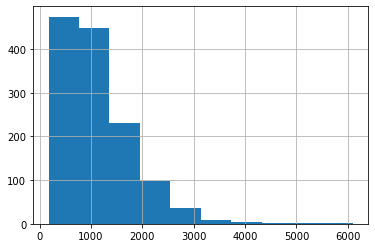

In [5]:
df['Price_euros'].hist()

Text(0.5, 1.0, 'Normalized data')

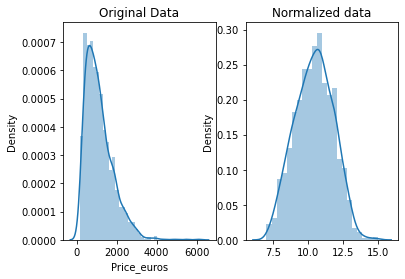

In [6]:
ori = df['Price_euros']
normalized_data = stats.boxcox(ori)
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(ori, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

<AxesSubplot:>

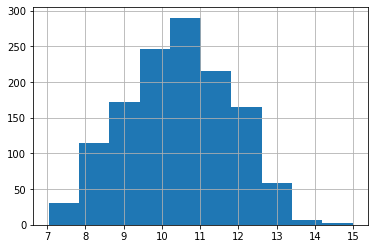

In [7]:
df['temp']=normalized_data[0]
df['temp'].hist()

### Data Cleaning
    Convert Ram to Numerical Value
    Convert Weight to Numerical Value
    Convert Screen Resolution

    Convert GPU / Discard Unique Terms / Convert to BenchMark Score as numerical variable

In [8]:
#Filter GPU Variable;
temp = df['Gpu'].value_counts()
GPU_list = []
GPU_dict = {}
for i in temp.index:
    if temp[i] > 20:
        GPU_list.append(i)
        GPU_dict[i] = 0
print(GPU_list)
#Filtering the Dataset, (Loss 400 rows data)
df = df[df['Gpu'].isin(GPU_list)]
#GPU BenchMark Score
#https://benchmarks.ul.com/zh-hans/compare/best-gpus
GPU_dict = {'Intel HD Graphics 620': 337,
            'Intel HD Graphics 520': 320,
            'Intel UHD Graphics 620': 337,
            'Nvidia GeForce GTX 1050': 2091,
            'Nvidia GeForce GTX 1060': 3642,
            'Nvidia GeForce 940MX': 601,
            'AMD Radeon 530': 412,
            'Intel HD Graphics 500': 236,
            'Intel HD Graphics 400': 150,
            'Nvidia GeForce GTX 1070': 5554,
            'Intel HD Graphics': 337,
            'Nvidia GeForce GTX 1050 Ti': 2342,
            'AMD Radeon R5 M430': 1100}
GPU_series = df['Gpu']
GPU_score = []
for ele in GPU_series:
    GPU_score.append(GPU_dict[ele])
df['GPU_score'] = GPU_score
df

['Intel HD Graphics 620', 'Intel HD Graphics 520', 'Intel UHD Graphics 620', 'Nvidia GeForce GTX 1050', 'Nvidia GeForce GTX 1060', 'Nvidia GeForce 940MX', 'AMD Radeon 530', 'Intel HD Graphics 500', 'Intel HD Graphics 400', 'Nvidia GeForce GTX 1070', 'Intel HD Graphics', 'Nvidia GeForce GTX 1050 Ti', 'AMD Radeon R5 M430']


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,temp,GPU_score
laptopID,,,,,,,,,,,,,,
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,9.357922,337
10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00,9.974138,337
11,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86kg,393.90,8.589821,337
12,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,1.86kg,344.99,8.328410,320
14,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,498.90,9.065737,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,209.00,7.375435,150
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,9.574948,320
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,11.459688,320


In [9]:
#Convert Ram to Numerical Value
ram = df['Ram']
temp = []
for i in ram:
    temp.append(int(i[:-2]))
df['Ram'] = temp
#Convert Weight to Numerical Value
weight = df['Weight']
temp = []
for i in weight:
    temp.append(float(i[:-2]))
df['Weight'] = temp

In [10]:
#Get CPU Freq
df['Cpu_model'] = df['Cpu'].str.extract(r'(i\d|AMD|Samsung|Pentium|Celeron|Atom|Core M|Xeon)')
df.Cpu_model.isnull().sum()
df['Cpu_freq'] = df['Cpu'].str.extract(r'(\d+\.\d+GHz|\d+GHz)')
df['Cpu_freq'] = df['Cpu_freq'].str.replace('GHz','').astype('float64')
df['Cpu_freq'].isnull().sum()

0

In [11]:
#Clean the form of Memory
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new2 = df["Memory"].str.split("+", n = 1, expand = True)
#Set several temp series
df["first"]= new2[0]
df["first"]=df["first"].str.strip()
df["second"]= new2[1]
#Store in data
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['first'] = df['first'].str.replace(r'\D', '')
df["second"].fillna("0", inplace = True)
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['second'] = df['second'].str.replace(r'\D', '')
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)
df["Total_Memory"]=(df["first"]*(df["Layer1HDD"]+df["Layer1SSD"]+df["Layer1Hybrid"]+df["Layer1Flash_Storage"])+df["second"]*(df["Layer2HDD"]+df["Layer2SSD"]+df["Layer2Hybrid"]+df["Layer2Flash_Storage"]))
df["Memory"]=df["Total_Memory"]
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])
#Convert Screen Resolution to total resolution
#Add two new columns: x-res and y-res
new = df["ScreenResolution"].str.split("x", n = 1, expand = True) 
df["X_res"]= new[0]
df["Y_res"]= new[1]
df["Y_res"]= pd.to_numeric(df["Y_res"])
df["Y_res"]= df["Y_res"].astype(float)
df["X_res"]=(df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: pd.Series(x).astype(int)).mean(1))
df["X_res"]=pd.to_numeric(df["X_res"])
df["PPI"]=(((df["X_res"]**2+df["Y_res"]**2)**(1/2))/df["Inches"]).astype(float)
df["ScreenResolution"]=(df["X_res"]*df["Y_res"]).astype(float)
df["Ram"] = df["Ram"].astype(int)
df["Weight"] = df["Weight"].astype(float)
#Remove Temp series columns
df=df.drop(['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage','Total_Memory'],axis=1)

In [12]:
#Show df
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,GPU_score,Cpu_model,Cpu_freq,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
laptopID,,,,,,,,,,,,,,,,,,,,,
3,HP,250 G6,Notebook,15.6,2073600.0,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,...,337,i5,2.5,0,256,0,0,1920.0,1080.0,141.211998
10,Acer,Swift 3,Ultrabook,14.0,2073600.0,Intel Core i5 8250U 1.6GHz,8,256,Intel UHD Graphics 620,Windows 10,...,337,i5,1.6,0,256,0,0,1920.0,1080.0,157.350512
11,HP,250 G6,Notebook,15.6,1049088.0,Intel Core i5 7200U 2.5GHz,4,500,Intel HD Graphics 620,No OS,...,337,i5,2.5,500,0,0,0,1366.0,768.0,100.454670
12,HP,250 G6,Notebook,15.6,2073600.0,Intel Core i3 6006U 2GHz,4,500,Intel HD Graphics 520,No OS,...,320,i3,2.0,500,0,0,0,1920.0,1080.0,141.211998
14,Dell,Inspiron 3567,Notebook,15.6,2073600.0,Intel Core i3 6006U 2GHz,4,256,AMD Radeon R5 M430,Windows 10,...,1100,i3,2.0,0,256,0,0,1920.0,1080.0,141.211998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,HP,Stream 11-Y000na,Netbook,11.6,1049088.0,Intel Celeron Dual Core N3060 1.6GHz,2,32,Intel HD Graphics 400,Windows 10,...,150,Celeron,1.6,0,0,0,32,1366.0,768.0,135.094211
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,2073600.0,Intel Core i7 6500U 2.5GHz,4,128,Intel HD Graphics 520,Windows 10,...,320,i7,2.5,0,128,0,0,1920.0,1080.0,157.350512
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,5760000.0,Intel Core i7 6500U 2.5GHz,16,512,Intel HD Graphics 520,Windows 10,...,320,i7,2.5,0,512,0,0,3200.0,1800.0,276.053530


In [13]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Inches,-0.382086,-0.068808
ScreenResolution,3.390925,12.792263
Ram,1.808563,5.357443
Memory,1.140584,1.195379
Weight,1.244311,3.075833
Price_euros,0.895557,0.501240
temp,-0.189992,-0.617872
GPU_score,2.398015,5.181993
Cpu_freq,-0.861442,0.016994
HDD,0.978792,0.181988


In [14]:
#Summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 3 to 1320
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           917 non-null    object 
 1   Product           917 non-null    object 
 2   TypeName          917 non-null    object 
 3   Inches            917 non-null    float64
 4   ScreenResolution  917 non-null    float64
 5   Cpu               917 non-null    object 
 6   Ram               917 non-null    int64  
 7   Memory            917 non-null    int64  
 8   Gpu               917 non-null    object 
 9   OpSys             917 non-null    object 
 10  Weight            917 non-null    float64
 11  Price_euros       917 non-null    float64
 12  temp              917 non-null    float64
 13  GPU_score         917 non-null    int64  
 14  Cpu_model         917 non-null    object 
 15  Cpu_freq          917 non-null    float64
 16  HDD               917 non-null    int64  
 

###
    Get Target variables' Correlations with other variables

In [15]:
#Show Correlations
df.corr()['Price_euros'].sort_values(ascending=False)

Price_euros         1.000000
temp                0.955045
Ram                 0.757485
SSD                 0.694911
X_res               0.546905
Y_res               0.540425
GPU_score           0.526482
Cpu_freq            0.517071
ScreenResolution    0.492972
PPI                 0.479209
Memory              0.234718
Weight              0.140668
Inches              0.031061
Hybrid             -0.019268
HDD                -0.027736
Flash_Storage      -0.126431
Name: Price_euros, dtype: float64

###
    Filter the term of correlations that greater than 0
    And show SNS plot

Inches              0.031061
ScreenResolution    0.492972
Ram                 0.757485
Memory              0.234718
Weight              0.140668
Price_euros         1.000000
temp                0.955045
GPU_score           0.526482
Cpu_freq            0.517071
HDD                 0.027736
SSD                 0.694911
Hybrid              0.019268
Flash_Storage       0.126431
X_res               0.546905
Y_res               0.540425
PPI                 0.479209
Name: Price_euros, dtype: float64


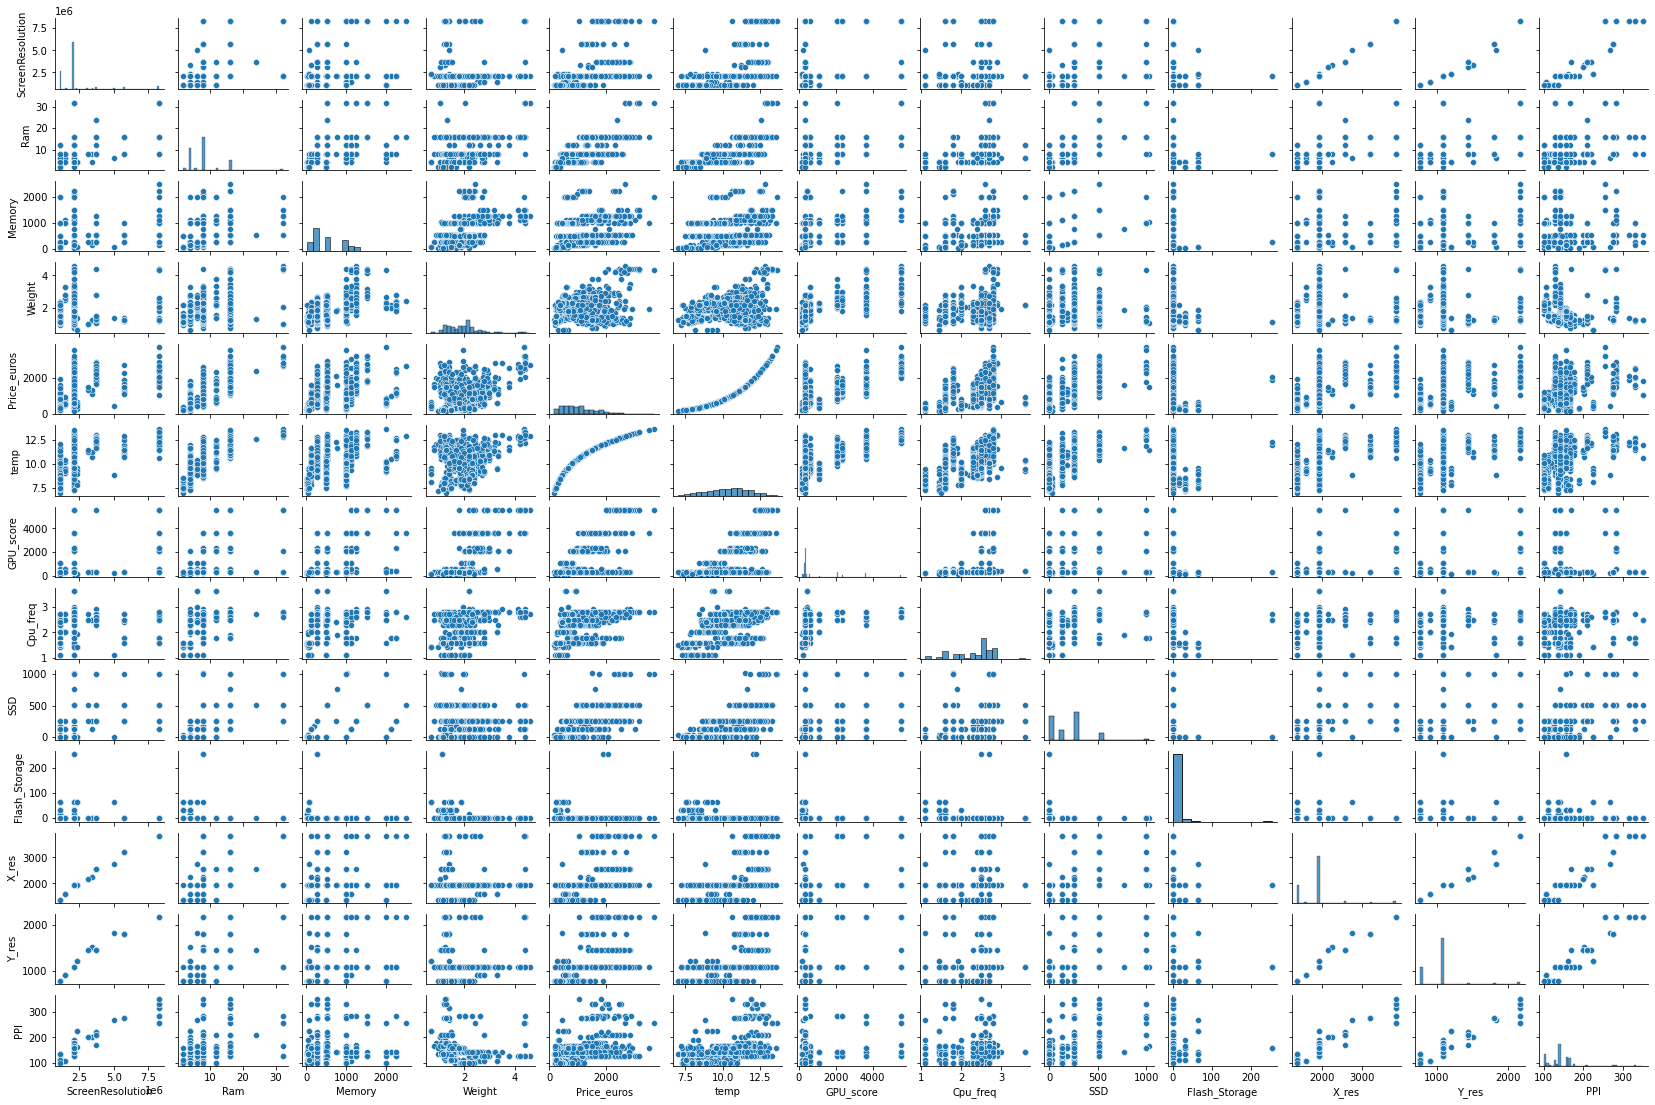

In [16]:
cor = df.corr()
cor_target = abs(cor["Price_euros"])
print(cor_target)
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
df = df[relevant_features.index]
sns.pairplot(df, height = 1.2, aspect=1.5)

### Data Scaler & CV
    Split Train/Test Data, Shuffle the Data, Apply Data_Scalar
    Apply Linear Reg model with pipline

In [17]:
rcv = RidgeCV(alphas = [1e-8, 1e-1, 1, 10], store_cv_values = True)

x = df[relevant_features.index]
x = x.drop(columns='Price_euros')
y = df['Price_euros']

model = make_pipeline(StandardScaler(), rcv)
model.fit(x, y)
print(f'MSE for each of the alphas: {np.mean(model.steps[1][1].cv_values_, axis=0)}')
print(f'MSE corresponding to best alpha {model.steps[1][1].alpha_}: {np.mean(model.steps[1][1].cv_values_, axis=0)[0]}')

MSE for each of the alphas: [22847.81816785 22844.23924529 22826.87721448 23093.24288456]
MSE corresponding to best alpha 1.0: 22847.818167852718


### Best Alpha 0.1

In [18]:
rcv = RidgeCV(alphas=0.1, store_cv_values = True)
model = make_pipeline(StandardScaler(), rcv)
model.fit(x, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv', RidgeCV(alphas=array(0.1), store_cv_values=True))])

### Result:

In [19]:
# model = LinearRegression()
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.2)
# Fit the model against the training data
model.fit(X_train, y_train)
# Evaluate the model against the testing data
print('Train:', model.score(X_train, y_train))
print(f"Adjusted R^2: {1 - (1-model.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)}")
print("MSE:",mean_squared_error(y_train, model.predict(X_train)))
print()
print('Test:', model.score(X_test, y_test))
print(f"Adjusted R^2: {1 - (1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}")
print("MSE:",mean_squared_error(y_test, model.predict(X_test)))

Train: 0.9468869086415629
Adjusted R^2: 0.9460016904522556
MSE: 21615.59290002856

Test: 0.9376213923654686
Adjusted R^2: 0.933243946215677
MSE: 23046.679260657515


###
    Multi Linear Reg Model

In [20]:
x = df[relevant_features.index]
x = x.drop(columns='Price_euros')
y = df['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.2)
model0 = LinearRegression()
model0.fit(X_train, y_train)
# Evaluate the model against the testing data
print('Train:', model0.score(X_train, y_train))
print(f"Adjusted R^2: {1 - (1-model0.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)}")
print("MSE:",mean_squared_error(y_train, model.predict(X_train)))
print()
print('Test:', model0.score(X_test, y_test))
print(f"Adjusted R^2: {1 - (1-model0.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}")
print("MSE:",mean_squared_error(y_test, model.predict(X_test)))

Train: 0.9471445529548804
Adjusted R^2: 0.9462636288374617
MSE: 21167.608390036836

Test: 0.9385641134685572
Adjusted R^2: 0.934252823185649
MSE: 24831.313205352817


### Coefficient:

In [21]:
print(model0.coef_)
print(model0.intercept_)

[ 1.79576513e-04  1.28016056e+01 -1.69591043e-02 -2.70437534e+01
  4.04538650e+02  6.86601127e-02 -8.87920408e+01  2.27224149e-01
  2.11150015e+00 -2.40581558e-01 -5.34826008e-01  5.13821978e-01]
-2495.9881248741713


### Equation
$\hat{y} = -2495.98 + 1.79576513e-04x_1 + 1.28016056e+01 x_2 + -1.69591043e-02 x_3 + ...$

In [22]:
y_pred = model0.predict(X_test)
new_df = X_test
new_df['true_price'] = y_test
new_df['pred_price'] = y_pred
new_df

,ScreenResolution,Ram,Memory,Weight,temp,GPU_score,Cpu_freq,SSD,Flash_Storage,X_res,Y_res,PPI,true_price,pred_price
laptopID,,,,,,,,,,,,,,
461,2073600.0,8,1128,2.36,10.496599,412,1.8,128,0,1920.0,1080.0,141.211998,979.00,1072.697731
507,1049088.0,4,64,1.20,8.299925,236,1.1,0,64,1366.0,768.0,135.094211,340.00,451.414509
361,2073600.0,8,2128,2.02,10.478282,412,1.8,128,0,1920.0,1080.0,141.211998,970.90,1057.523438
469,2073600.0,8,1000,2.37,9.914898,337,2.5,0,0,1920.0,1080.0,141.211998,749.00,742.888865
885,2073600.0,16,256,1.23,11.951688,601,2.7,256,0,1920.0,1080.0,146.860478,1849.00,1774.148937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,2073600.0,16,1256,1.80,12.249628,3642,2.8,256,0,1920.0,1080.0,141.211998,2094.48,2059.317015
915,2073600.0,8,256,1.13,12.196849,337,2.7,0,256,1920.0,1080.0,157.350512,2049.00,2243.255940
1224,1049088.0,8,256,1.91,9.372313,337,2.5,256,0,1366.0,768.0,100.454670,579.00,701.846636


###
    Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
x = df[relevant_features.index]
x = x.drop(columns='Price_euros')
y = df['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.2)
model1=RandomForestRegressor()
model1.fit(X_train,y_train)
print('Train:', model1.score(X_train, y_train))
print("MSE:",mean_squared_error(y_train, model.predict(X_train)))
print()
print('Test:', model1.score(X_test, y_test))
print("MSE:",mean_squared_error(y_test, model.predict(X_test)))

Train: 0.9998895843064864
MSE: 21420.090727524686

Test: 0.9998931512423488
MSE: 23825.500415251754


In [24]:
y_pred = model1.predict(X_test)
new_df = X_test
new_df['true_price'] = y_test
new_df['pred_price'] = y_pred
new_df

,ScreenResolution,Ram,Memory,Weight,temp,GPU_score,Cpu_freq,SSD,Flash_Storage,X_res,Y_res,PPI,true_price,pred_price
laptopID,,,,,,,,,,,,,,
706,2073600.0,16,512,1.36,11.987384,320,2.5,512,0,1920.0,1080.0,165.632118,1877.00,1870.9985
1094,2073600.0,4,500,2.31,10.407139,320,2.3,0,0,1920.0,1080.0,141.211998,940.00,939.5938
804,3686400.0,8,256,1.42,12.507720,337,2.5,256,0,2560.0,1440.0,209.800683,2330.00,2328.3755
1059,2073600.0,8,756,1.84,12.259792,320,2.4,256,0,1920.0,1080.0,141.211998,2103.34,2113.7910
63,2073600.0,8,256,1.70,9.442971,337,2.7,256,0,1920.0,1080.0,157.350512,599.00,599.1505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,8294400.0,16,1000,1.29,12.629449,337,1.8,1000,0,3840.0,2160.0,331.264236,2449.00,2444.6102
151,2073600.0,16,1256,2.90,12.173310,5554,2.8,256,0,1920.0,1080.0,127.335675,2029.00,2031.1412
1268,1049088.0,4,500,2.20,8.206025,337,1.6,0,0,1366.0,768.0,100.454670,324.00,324.2031


### Variance and Bias
    There is variance in my model, because the model works well in the traning sets, but its performance turns to be worse when it is applied in testing set.
    And there is also bias, theere is error between the real value and the predicted value, which caused there is some degrees of bias.